<a href="https://colab.research.google.com/github/mohammedshaneeb-ai/FeatureScaling/blob/master/Ciraf_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Classification with cifar10 dataset

In [3]:
from tensorflow.keras import layers,models,datasets
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [5]:
train_images.shape

(50000, 32, 32, 3)

In [6]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
test_images.shape

(10000, 32, 32, 3)

In [8]:
test_images

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [9]:
# Now our image range is from 0 to 255 
# we need to normalize this to 0 to 1
train_images  = train_images/255
test_images = test_images/255

In [10]:
train_images

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [11]:
train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
# labels are 2d array we want to convert it into 1d array
train_labels = train_labels.reshape(-1)
test_labels = test_labels.reshape(-1)

In [13]:
# Specifieng class 
classes = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']



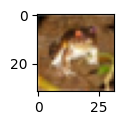

In [14]:
plt.figure(figsize=(1,1))
plt.imshow(train_images[0])

In [15]:
def plot_image(X,y,index):
  plt.figure(figsize=(3,3))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

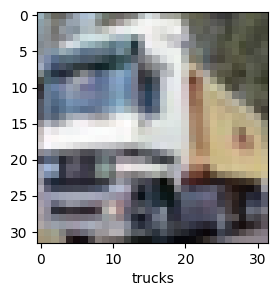

In [16]:
plot_image(train_images,train_labels,1)

In [17]:
# Buid Artificial Neural Network

ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(5000,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(3000,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(2000,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10,activation='softmax')
])


In [18]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [19]:
ann.fit(train_images,train_labels,batch_size=64,epochs=20,validation_data=(test_images, test_labels))

Epoch 1/20
782/782 [==============================] - 13s 10ms/step - loss: 1.9248 - accuracy: 0.3072 - val_loss: 1.8731 - val_accuracy: 0.3358
Epoch 2/20
782/782 [==============================] - 8s 10ms/step - loss: 1.7329 - accuracy: 0.3848 - val_loss: 1.7375 - val_accuracy: 0.3742
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 1.6522 - accuracy: 0.4148 - val_loss: 1.6679 - val_accuracy: 0.3990
Epoch 4/20
782/782 [==============================] - 8s 10ms/step - loss: 1.5965 - accuracy: 0.4378 - val_loss: 1.5716 - val_accuracy: 0.4403
Epoch 5/20
782/782 [==============================] - 8s 10ms/step - loss: 1.5510 - accuracy: 0.4500 - val_loss: 1.8448 - val_accuracy: 0.3698
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 1.5212 - accuracy: 0.4629 - val_loss: 1.8125 - val_accuracy: 0.3851
Epoch 7/20
782/782 [==============================] - 8s 10ms/step - loss: 1.4875 - accuracy: 0.4746 - val_loss: 1.6654 - val_accuracy: 0.4101


In [20]:
y_pred = ann.predict(test_images)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[2.4030823e-02, 6.6616833e-03, 1.4576840e-01, ..., 9.6411107e-04,
        3.7922747e-02, 1.0448180e-03],
       [2.5789479e-02, 1.2953080e-01, 1.4367928e-03, ..., 3.3480555e-04,
        5.0595516e-01, 3.3354482e-01],
       [5.7132554e-01, 6.9998026e-02, 7.3287622e-03, ..., 3.8633752e-03,
        2.8471112e-01, 5.3293627e-02],
       ...,
       [1.0113743e-03, 1.0482918e-04, 2.1843205e-01, ..., 1.5001452e-02,
        5.5514663e-03, 2.0911840e-03],
       [2.6618781e-02, 1.4369570e-03, 1.8355249e-01, ..., 4.0271319e-02,
        1.5220863e-03, 1.2822251e-03],
       [5.0341483e-02, 2.6074029e-03, 9.1036797e-02, ..., 4.6558827e-01,
        6.0119182e-03, 4.7255615e-03]], dtype=float32)

In [21]:
y_pred_classes = [np.argmax(element) for element in y_pred]

In [22]:
y_pred_classes[1]

8

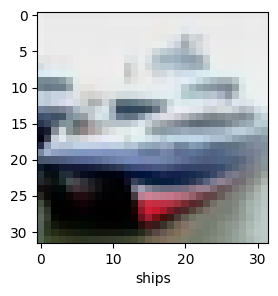

In [23]:
plot_image(test_images,y_pred_classes,1)

In [25]:
## Creating CNN

cnn = models.Sequential([
  layers.Conv2D(filters=32,kernel_size =(3,3),activation='relu',input_shape = (32,32,3)),
  layers.MaxPool2D((2,2)),

  layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
  layers.MaxPool2D((2,2)),

  layers.Flatten(),
  layers.Dense(64,activation='relu'),
  layers.Dense(10,activation='softmax')
    
])

In [26]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
cnn.fit(train_images,train_labels,batch_size=64,epochs=20,validation_data = (test_images,test_labels))

Epoch 1/20
782/782 [==============================] - 11s 6ms/step - loss: 1.5897 - accuracy: 0.4264 - val_loss: 1.3583 - val_accuracy: 0.5091
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 1.2560 - accuracy: 0.5566 - val_loss: 1.2240 - val_accuracy: 0.5709
Epoch 3/20
782/782 [==============================] - 4s 6ms/step - loss: 1.1116 - accuracy: 0.6094 - val_loss: 1.1058 - val_accuracy: 0.6099
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 1.0205 - accuracy: 0.6432 - val_loss: 1.0237 - val_accuracy: 0.6439
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.9622 - accuracy: 0.6664 - val_loss: 0.9978 - val_accuracy: 0.6517
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.9135 - accuracy: 0.6826 - val_loss: 1.0354 - val_accuracy: 0.6538
Epoch 7/20
782/782 [==============================] - 4s 6ms/step - loss: 0.8753 - accuracy: 0.6985 - val_loss: 0.9509 - val_accuracy: 0.6683
Epoch

In [43]:
y_pred = cnn.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [44]:
y_pred

array([[7.5236523e-05, 9.1974175e-04, 5.2119191e-03, ..., 3.8846015e-06,
        6.2546939e-02, 8.5755158e-04],
       [4.6925684e-03, 1.5704823e-01, 3.3951812e-05, ..., 4.8872195e-09,
        8.3420968e-01, 4.0015816e-03],
       [2.4506733e-02, 8.2116842e-02, 1.4636548e-03, ..., 1.5736942e-04,
        8.6943305e-01, 1.5789323e-02],
       ...,
       [2.5242729e-05, 1.0160423e-07, 2.1952255e-02, ..., 8.1854109e-03,
        2.0701889e-04, 1.7298815e-07],
       [1.3942553e-01, 1.3513476e-04, 3.1360558e-03, ..., 1.0212512e-05,
        1.7198921e-06, 7.7749883e-07],
       [2.9630493e-07, 6.7549948e-09, 1.9973957e-05, ..., 9.9882275e-01,
        4.2859547e-09, 3.4192471e-08]], dtype=float32)

In [45]:
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[0]

3

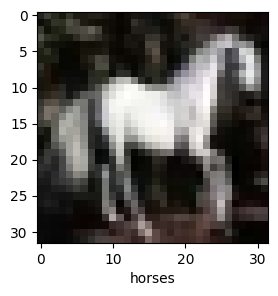

In [47]:
plot_image(test_images,y_pred_classes,13)